|  Label                           |   Training   |  Validation  |  Min ValLoss  |  Epochs  |
|  runet_MSE_gradient_monitor      |   0.000059   |   0.000135   |    0.000131   |    200   |
|  runet_MSE_gradient              |   0.000035   |   0.000139   |    0.000126   |    200   |


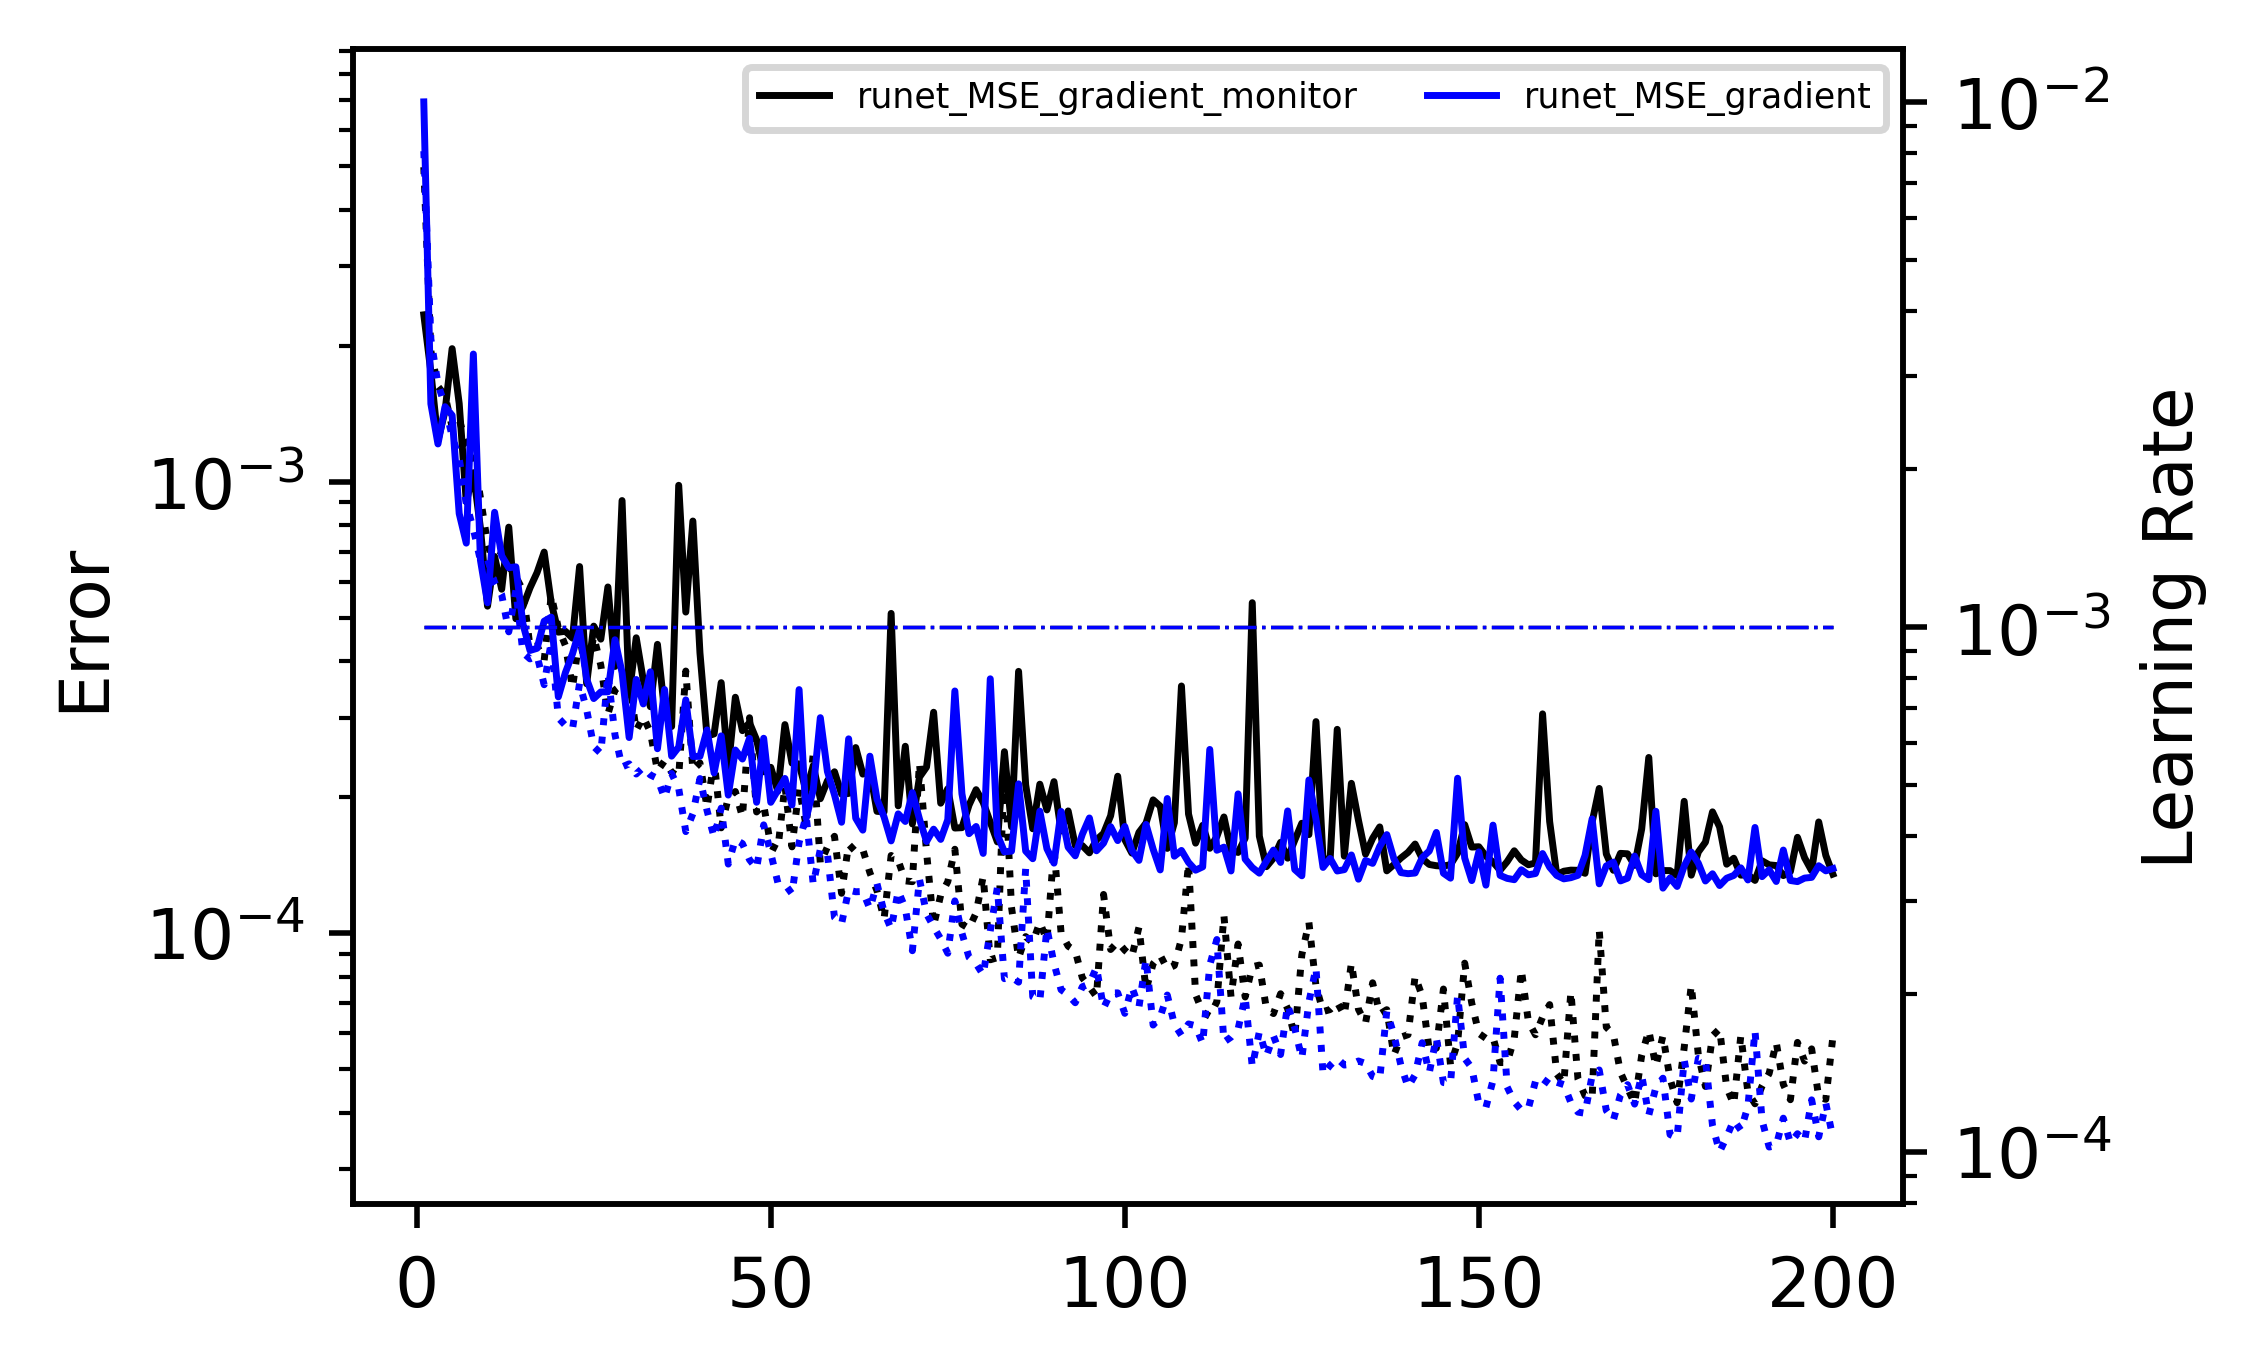

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os 

def print_loss(losses, tags, xlims=None):
    colors = ['black',    'blue',      'red',      'cyan',    'orange',    
              'green',    'purple',   'tomato',   'magenta',   'yellow', 
              'royalblue', 'lightblue', 'maroon' ,   'grey',    'teal',    
              'darkblue', 'darkorange', 'gold']          
    handles = []  
    labels = []
    lw = 1
    # fig, ax = plt.figure(figsize=(4,3), dpi=500)
    fig, ax1 = plt.subplots(figsize=(4,3), dpi=500)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    
    print('|  {:30s}  |   Training   |  Validation  |  Min ValLoss  |  Epochs  |'.format('Label'))
    kk = 0
    for i, loss in enumerate(losses):
        if loss == []:
            print('     =====================    {:14s}    =====================     '.format(tags[i]))
        else:
            epochs = len(loss['train_loss_pixel'])
            line = ax1.plot(np.array(range(1, epochs+1)), loss['train_loss_pixel'], lw=lw, color=colors[kk], ls=':')
            line = ax1.plot(np.array(range(1, epochs+1)), loss['valid_loss_pixel'], lw=lw, color=colors[kk])
            ax2.plot(np.array(range(1, epochs+1)), loss['learning_rate'], lw=lw/2, color=colors[kk], ls='-.')
            print('|  {:30s}  |   {:.6f}   |   {:.6f}   |    {:.6f}   |    {:3s}   |'.
                format(
                    tags[i], loss['train_loss_pixel'][-1], loss['valid_loss_pixel'][-1], 
                    min(loss['valid_loss_pixel']), str(len(loss['valid_loss_pixel']))
                      )
                )
            handles.append(line[0])
            labels.append(tags[i])
            kk += 1
        
    ax1.set_ylabel('Error') 
    ax2.set_ylabel('Learning Rate') 
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    plt.legend(handles=handles, labels=labels, ncols=3, fontsize=5, loc='upper right')
    #plt.xlim([-1, 115])
    # plt.ylim([0.04,.15])
    plt.xlabel('Epoch')
    
dir_to_loss = '/scratch1/zhenq/2.SpatioTemporalSurrogate/checkpoint'

chkpts = [
    'runet_MSE_gradient_monitor',
    'runet_MSE_gradient', 
         ]

# os.listdir(dir_to_loss) # ['1e-4', '1e-4', '5e-4']
losses = [np.load(os.path.join(dir_to_loss, _, 'loss_epoch.npz')) for _ in chkpts]
labels = chkpts

print_loss(losses, labels)

